# Find extrema lines from isochore equation of state data in P(T) plane

In [2]:
import pandas as pd
from scipy.interpolate import UnivariateSpline
import matplotlib.pyplot as plt

In [3]:
# Read data
df = pd.read_csv('../src/Data/pruned025compiledEOSAll',sep='\t')
df.head()

,Temperature(K),Pressure (MPa),Density (kg/m^3)
0,330.0,157.570,1040.0
1,325.0,149.266,1040.0
2,320.0,140.359,1040.0
3,315.0,133.277,1040.0
4,310.0,126.145,1040.0


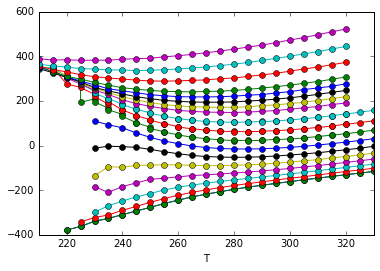

In [4]:
df.columns = ['T', 'P', 'density']
ddf = df.groupby('density')

# plot EOS
plt.style.context('bmh')
fig, ax = plt.subplots(1, 1)

ddf.apply(lambda f: f.sort_values(by='T').plot(x='T',y='P',marker='o',ax=ax,legend=False))
plt.show()

In [5]:
## find density maximum correspoding to minimum in pressure along isochore
import numpy as np
def findmaxdensity(df,sign):
    Obs=df.sort_values(by='T').as_matrix(['T','P'])
    xs,ys = Obs[:,0],Obs[:,1]
    spl = UnivariateSpline(xs,ys,k=4,s=0.)
    myroots = spl.derivative().roots()
    
    count = 0
    td2ydx2 = -np.inf*sign
    resx, resy = np.nan, np.array([np.nan])
    for r in myroots:
        y, dydx, d2ydx2 = spl(r,0), spl(r,1), spl(r,2)
        if (sign*d2ydx2 > sign*0.00001):
            count += 1
            if (sign*td2ydx2 < sign*d2ydx2 ):
                resx, resy = r, y
                #td2ydx2 = d2ydx2
                
    return pd.DataFrame({'T':resx, 'P':resy.ravel()[0]},index=df['density'].unique())
#ddf.apply(findmaxdensity)


ddg = df[df['density']==980.]
findmaxdensity(ddg,1)

,P,T
980.0,-15.710625,283.301884


In [6]:
dTmax = ddf.apply(findmaxdensity,1)
dTmin = ddf.apply(findmaxdensity,-1)

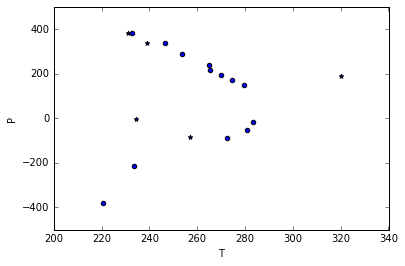

In [7]:
fig,ax = plt.subplots(1,1)
dTmax.dropna(inplace=True,axis=0)
dTmin.dropna(inplace=True,axis=0)
dTmax.sort_values(by='T').plot(x='T',y='P',kind='scatter',ax=ax)
dTmin.sort_values(by='T').plot(x='T',y='P',kind='scatter',ax=ax,marker='*')
#dTmin.dropna(inplace=True,axis=0).sort_values(by='T').plot(x='T',y='P',kind='scatter',ax=ax)
plt.show()

In [10]:
dTmax.reset_index(drop=True,inplace=True)
dTmax['Feature'] = 'Tmax'
dTmin.reset_index(drop=True,inplace=True)
dTmin['Feature'] = 'Tmin'
AllT= dTmax.append(dTmin)

In [9]:
AllT.to_csv('../src/ScalingWaterModels/FeaturesTIP5P.dat', sep='\t',index=False)